In [ ]:
!pip install opencv-python

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [ ]:
img=cv2.imread("img1.jpg") #or r"relative address C:/..."
cv2.imshow("window_name",img) #window of image displays on screen
print(img)#gives bgr channels(0-255)
print(img.shape)#gives (height,width,no. of channels) in pixels
resize_image=cv2.resize(img,(500,500)) #width height

img=cv2.imread("img1.jpg",0) #0 means grayscale

img_with_line=cv2.line(img,(50,60),(50,100),(0,255,0),3)#(img,pt1,pt2,color,thickness)
img_with_rectangle=cv2.rectangle(img,(50,60),(50,100),(0,255,0),3)#(img,pt1,pt2,color,thickness)
img_with_circle=cv2.circle(img,(50,60),30,(0,255,0),3)#(img,center,radius,color,thickness)
img_with_arrowed_line=cv2.arrowedLine(img,(50,60),(50,100),(0,255,0),3)#(img,pt1,pt2,color,thickness)
img_with_elipse=cv2.ellipse(img,(50,60),(30,40),45,0,360,(0,255,0),3)#(img,center,axis,angle,startangle,endangle,color,thickness)
img_with_polylines=cv2.polylines(img,[np.array([[100,50],[150,200],[200,250]])],True,(0,255,0),3)#(img,points,isclosed,color,thickness)

merged_images=cv2.addWeighted(img1,0.5,img2,0.5,0)#(img1,weight1,img2,weight2,gamma) gamma is extra brightness
merged_images=cv2.bitwise_and(img1,img2)#(img1,img2) white is 1, black is 0. it merges and performs AND
scan_edges=cv2.Canny(img,100,200)#(img,threshold1,threshold2) lets us see image edges
image_with_border=cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,0,0))#(img,top,bottom,left,right,bordertype,value)

width,height=img.shape[0],img.shape[1]
rotated_image=cv2.warpAffine(img,cv2.getRotationMatrix2D((width/2,height/2),45,1),(width,height))#(img,m,(w,h)) where m ->(center,angle,scale)

#blur
gaussian_image=cv2.GaussianBlur(img,(5,5),0)#(img,kernelsize,sigmaX)
median_image=cv2.medianBlur(img,5)#(img,kernelsize)
bilateral_image=cv2.bilateralFilter(img,9,75,75)#(img,filtersize,sigmaColor,sigmaSpace)

cv2.waitKey(0) #hw long window of image stays on screen (in ms), 0 means it stays until we click any key
cv2.destroyAllWindows() #removes all image windows
cv2.destroyWindow("window_name")

h=np.hstack((img,img)) #two images in same window aligned horizontally
v=np.vstack((img,img)) #two images in same window aligned vertically
v=np.vstack((h,h))#4 images in 1 window

text=cv2.putText(img,"text1",(10,500),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),1)# text on image

cv2.imwrite("img1.jpg",img)#saves image

list1= os.listdir(r"C:/...")
list1 #gives me list of images present in that folder

In [ ]:
# Load the video from the specified file path
video = cv2.VideoCapture(r"C:/...path/videoname.mp4")
video = cv2.VideoCapture(0) #0 means webcam
video = cv2.VideoCapture(1) #1 means external webcam

# Loop through the video frames as long as the video is opened
while video.isOpened():
    # Read a frame from the video, 'r' is a boolean indicating success, 'frame' is the current frame
    r, frame = video.read()
    # If a frame was successfully read (r == True)
    if r == True:
        frame = cv2.resize(frame,(500,500))
        # Display the current frame in a window named "video_name"
        cv2.imshow("video_name", frame)
        # Wait for 1 millisecond between frames,ie frames per sec
        if cv2.waitKey(25) & oxff == ord('p'):#0 means static (shows 1st frame n stops), 25+ values make video slow. 0-25 increases speed of video
          break #if i click p, video ends
    # If no more frames are available (end of video), exit the loop
    else:
        break
# Release the video capture object, free up resources
video.release()
# Close all OpenCV windows that were opened
cv2.destroyAllWindows()


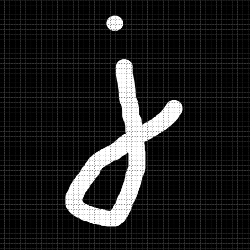

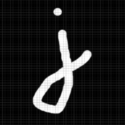

(250, 250, 3)
(125, 125, 3)


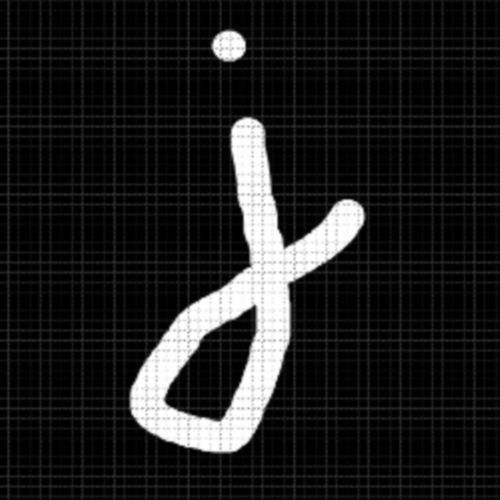

In [ ]:
# Morphological operations
img1 = cv2.imread(r"/content/img1.png")  # Ensure the correct file extension
img1 = cv2.resize(img1, (250, 250))
#erosion- erodes away boundary of foreground. pixel is 1 only if all pixels under kernel r 1,else r eroded(set to 0, ie black)(img,m=kernel matrix of size 5*5 of integer type,iterations)
eroded_image = cv2.erode(img1, np.ones((5, 5), np.uint8), iterations=1)
#dilation- increases white region. pixel is 1 if atleast one of the pixel under kernel is 1, ie white
dilated_image = cv2.dilate(img1, np.ones((5, 5), np.uint8), iterations=1)
#opening- erosion followed by dilation, removes white dots
opening_image = cv2.morphologyEx(img1, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
#closing- dilation followed by erosion, removes black dots
closing_image = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
#morphological gradient- difference od dilation n erosion, gives boundary
gradient_image = cv2.morphologyEx(img1, cv2.MORPH_GRADIENT, np.ones((5, 5), np.uint8))
#tophat- difference between input image n opening of image, part where there is excess of white turns black
tophat_image = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, np.ones((10, 10), np.uint8))
#blackhat- difference between input image n closing of image, part where there is excess of black turns white
blackhat_image = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, np.ones((5, 5), np.uint8))

#Image Pyramid
dec_image=cv2.pyrDown(img1)#downsamples image, decreases size by 2
inc_image=cv2.pyrUp(img1)#upsamples image, increases by 2

cv2_imshow(img1)
# cv2_imshow(eroded_image)
# cv2_imshow(dilated_image)
# cv2_imshow(opening_image)
# cv2_imshow(closing_image)
# cv2_imshow(gradient_image)
# cv2_imshow(tophat_image)
# cv2_imshow(blackhat_image)
cv2_imshow(dec_image)
cv2_imshow(inc_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


https://youtu.be/MVkny_XLK_U?si=M-dpb-hpYQaX6_XY